In [1]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(1)

# Create two features with some correlation
x = np.random.normal(5, 2, 100)
y = 2 * x + np.random.normal(0, 2, 100)  # strong linear correlation

df = pd.DataFrame({'Feature_X': x, 'Feature_Y': y})
df.head()


,Feature_X,Feature_Y
0,8.248691,15.603124
1,3.776487,10.001990
2,3.943656,8.694296
3,2.854063,6.895283
4,6.730815,11.271807


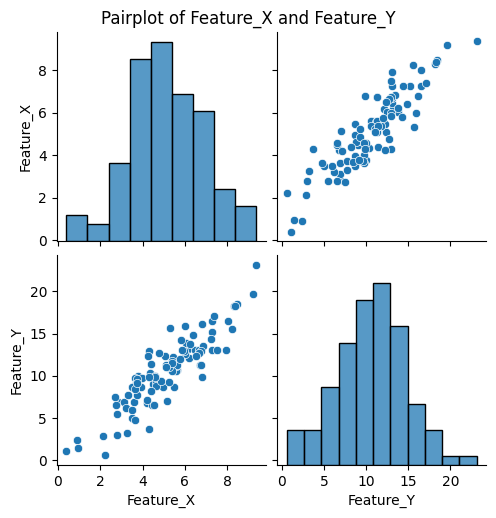

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.suptitle("Pairplot of Feature_X and Feature_Y", y=1.02)
plt.show()


## Mean

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

The mean is the average value of a feature. It tells you the center of mass or balance point of the data.
If you added a constant to every value, the mean would increase by that constant — the shape of the data wouldn’t change, just the location.

In [3]:
df.mean()


Feature_X     5.121166
Feature_Y    10.547921
dtype: float64

# Variance

$$
\text{Var}(x) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2
$$

Variance measures how spread out the data is around the mean.
A higher variance means the values are more dispersed.
It’s calculated as the average of the squared deviations from the mean.

In [4]:
df.var()       # Variance


Feature_X     3.165663
Feature_Y    17.380564
dtype: float64

# Standard deviation

$$
\sigma_x = \text{Std}(x) = \sqrt{\text{Var}(x)} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
$$

Standard deviation is the square root of the variance.
It has the same units as the original data and is often easier to interpret.
It tells you, on average, how far each point is from the mean.

In [5]:
df.std()       # Standard deviation (sqrt of variance)

Feature_X    1.779231
Feature_Y    4.169000
dtype: float64

# Covariance

$$
\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

Covariance tells us how two features change together:

* Positive covariance: they tend to increase together

* Negative covariance: one increases while the other decreases

It is scale-dependent and not bounded, so it’s hard to compare across datasets.

In [6]:
df.cov()


,Feature_X,Feature_Y
Feature_X,3.165663,6.633416
Feature_Y,6.633416,17.380564


# Correlation 

$$
\text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
$$

Correlation is a normalized version of covariance, ranging from -1 to 1.

It makes it easy to compare relationships, regardless of feature scale.

In [7]:
df.corr()


,Feature_X,Feature_Y
Feature_X,1.000000,0.894279
Feature_Y,0.894279,1.000000


### 🔍 Exercise 1: Plot Raw Features
Plot the two original features (`Feature_X` and `Feature_Y`) as line plots to see their shape and relationship over the sample index.
- What do you notice about their trend?
- Do they appear to be correlated?


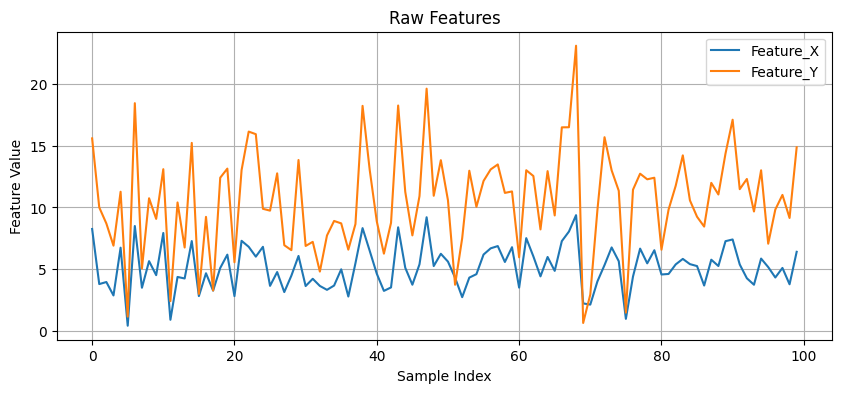

### ✂️ Exercise 2: Center the Features
Subtract the mean from both features and plot them again.
- What changed?
- What is the new mean of the features?
- Why is centering important for PCA?


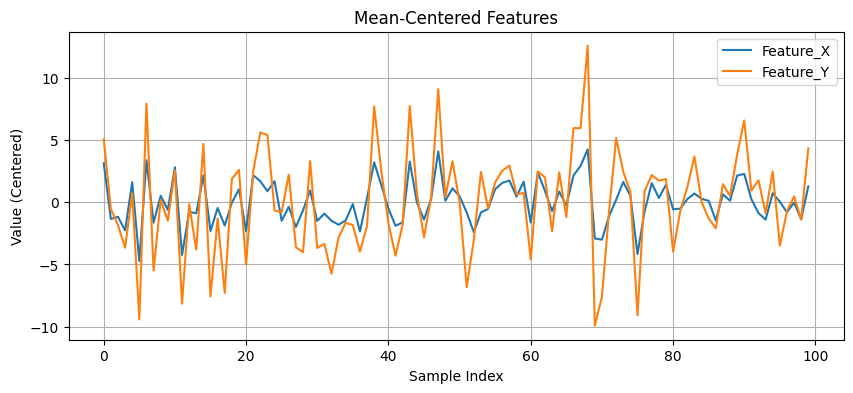

New means after centering:
Feature_X   -7.061018e-16
Feature_Y    2.087219e-15
dtype: float64


### ⚖️ Exercise 3: Standardize the Features
Divide each centered feature by its standard deviation to scale them.
- What’s the new mean and standard deviation?
- Why does this matter before PCA?


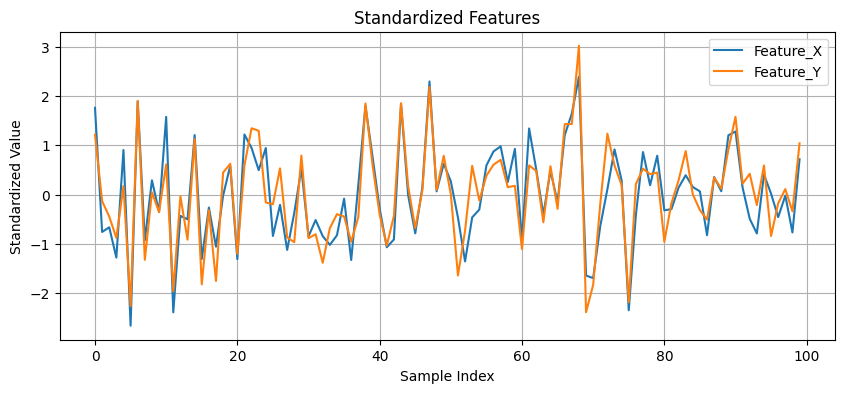

New means:
Feature_X   -3.796963e-16
Feature_Y    4.729550e-16
dtype: float64
New standard deviations:
Feature_X    1.0
Feature_Y    1.0
dtype: float64


### 🧪 What is a Projection?

A **projection** is what you get when you **drop a perpendicular** from a point onto a line (or vector).

In data, projecting a point onto a vector tells us:
> “How much of this data point lies in the direction of that vector?”

Mathematically, to project vector \( \vec{x} \) onto unit vector \( \vec{v} \):

$$
\text{proj}_{\vec{v}}(\vec{x}) = (\vec{x} \cdot \vec{v}) \vec{v}
$$

The dot product \( \vec{x} \cdot \vec{v} \) gives you the **scalar** magnitude of the projection.


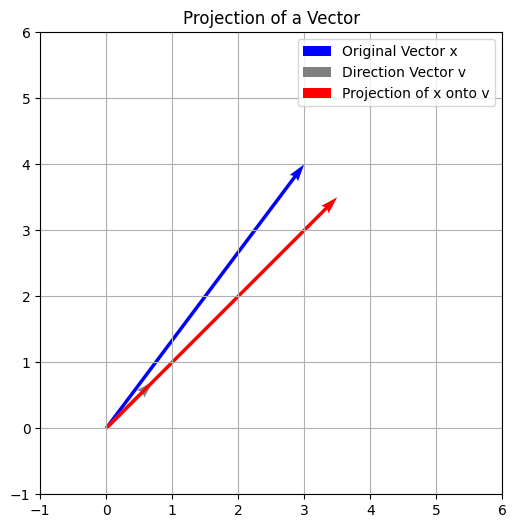

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define a data vector and a direction vector
x = np.array([3, 4])
v = np.array([1, 1])
v = v / np.linalg.norm(v)  # make it a unit vector

# Compute projection
projection_length = np.dot(x, v)
projection_vector = projection_length * v

# Plot
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, *x, angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector x')
plt.quiver(0, 0, *v, angles='xy', scale_units='xy', scale=1, color='gray', label='Direction Vector v')
plt.quiver(0, 0, *projection_vector, angles='xy', scale_units='xy', scale=1, color='red', label='Projection of x onto v')

plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.title("Projection of a Vector")
plt.show()


- The blue arrow is your original vector.
- The gray arrow is the direction you're projecting **onto**.
- The red arrow shows **how much of x** is in the direction of v — that's the projection!

This is how PCA projects your data onto the new axes (principal components).


### 🧬 What Are Eigenvectors and Eigenvalues?

In PCA, eigenvectors and eigenvalues come from the **covariance matrix** of your data.

- An **eigenvector** is a special direction where the data only **scales**, not rotates.
- The corresponding **eigenvalue** tells you **how much variance** the data has in that direction.

Mathematically:

$$
A \vec{v} = \lambda \vec{v}
$$

Where:
- \( A \) is your covariance matrix
- \( \vec{v} \) is the eigenvector (principal direction)
- \( \lambda \) is the eigenvalue (variance along that direction)

In PCA:
- Each eigenvector becomes a **principal component axis**
- Each eigenvalue tells you **how important** that axis is


In [12]:
# Use standardized data from earlier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df)

# Compute covariance matrix
cov_matrix = np.cov(X_std.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors (columns):\n", eigenvectors)


Eigenvalues:
 [0.10678906 1.91341296]

Eigenvectors (columns):
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


- Each **eigenvalue** tells you how much variance is captured by its corresponding **eigenvector**.
- The **first eigenvector** points in the direction of maximum variance — it becomes **PC1**.
- These eigenvectors form the new **PCA coordinate system**.


## 🚀 Part 3: Manual PCA Step-by-Step

This example brings it all together. We'll perform PCA **manually** on 2D standardized data by walking through the key steps:

1. **Center & standardize the data**  
   Remove the mean and scale to unit variance so all features contribute equally.

2. **Compute the covariance matrix**  
   Understand how features vary together — this captures the structure of the data.

3. **Get eigenvectors & eigenvalues**  
   These reveal the directions (eigenvectors) and importance (eigenvalues) of variation in the data.

We'll then project the data onto the first principal component to visualize PCA in action.


In [15]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris.keys())



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


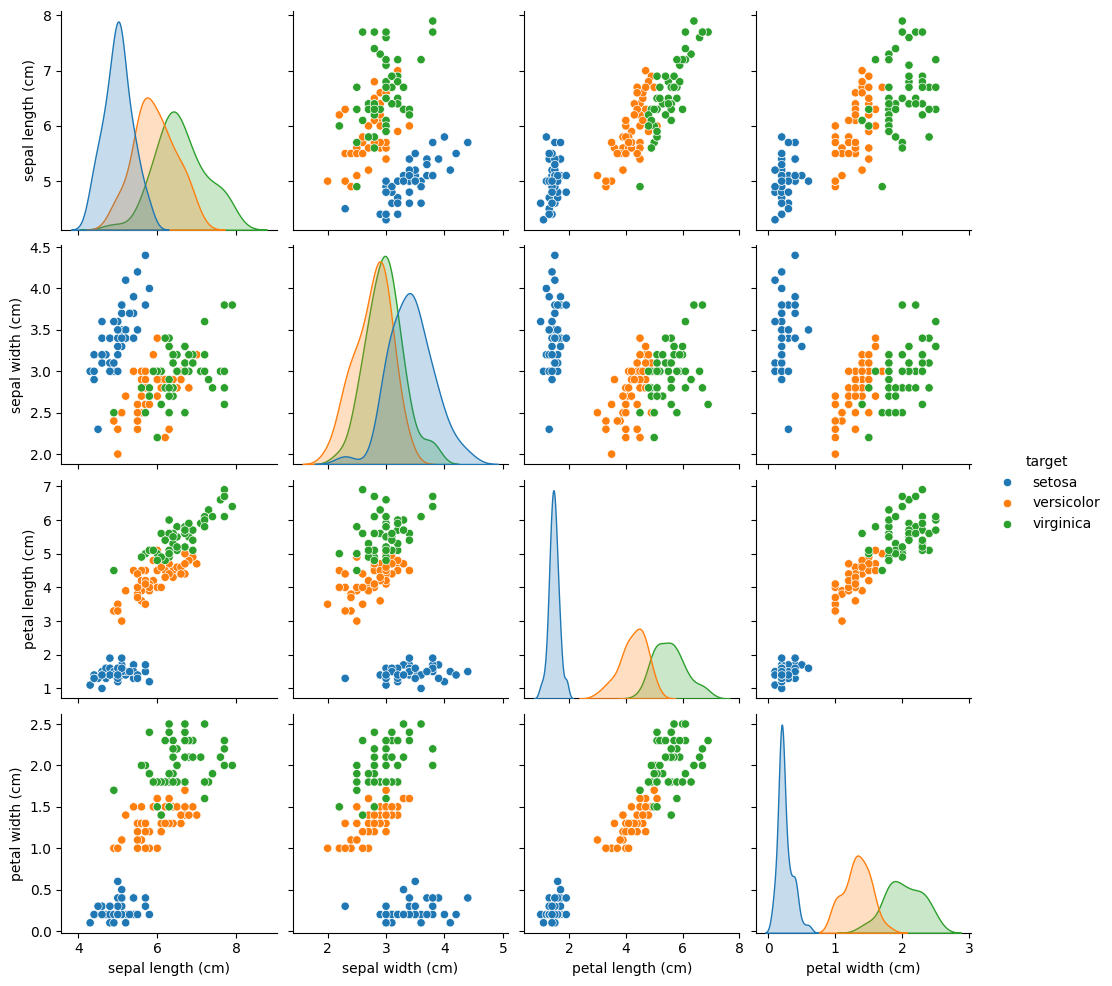

In [16]:
import seaborn as sns

# Rename classes using the iris target names
iris.frame["target"] = iris.target_names[iris.target]
_ = sns.pairplot(iris.frame, hue="target")

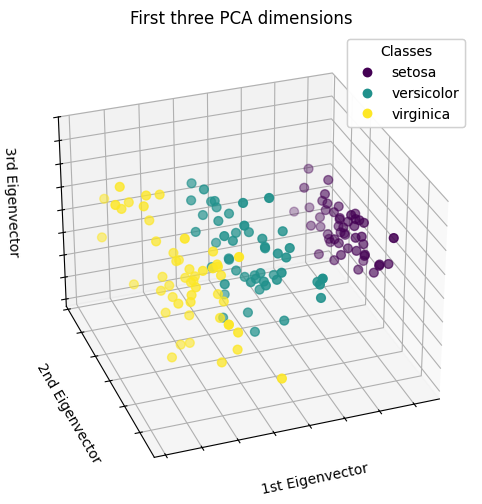

In [17]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
